In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/Yaphet Tewahade/Cloudy-with-a-Chance-of-Football/fixtures/raw_data/2019projections.csv')

In [2]:
# see how many rows and columns are in this dataset
shape_info = df.shape # set the dataframe's "shape" to a variable
print('This dataset evaluates {} nfl players based on 2019 projected and actual points from {} columns' # print this phrase with variables added in
      .format(shape_info[0], # using the .format method, insert the number of rows in the dataframe
              shape_info[1])) # using the .format method, insert the number of columns in the dataframe

This dataset evaluates 2577 nfl players based on 2019 projected and actual points from 9 columns


In [3]:
df.head(3) #look at the top 3 rows of the dataset

,Unnamed: 0,Week,Team,Player,Slot,Pos,Status,Proj,Actual
0,0,1,1,Saquon Barkley,2,RB,ACTIVE,23.115309,17.9
1,1,1,1,Alvin Kamara,2,RB,ACTIVE,21.168970,23.9
2,2,1,1,James White,23,Flex,ACTIVE,13.946106,13.2


In [4]:
df.tail(3) # look at the last 3 rows of the dataset

,Unnamed: 0,Week,Team,Player,Slot,Pos,Status,Proj,Actual
2574,2574,16,13,Jameis Winston,0,QB,QUESTIONABLE,19.503190,11.0
2575,2575,16,13,David Montgomery,20,Bench,ACTIVE,11.467978,6.9
2576,2576,16,13,Randall Cobb,20,Bench,ACTIVE,9.338627,12.3


In [5]:
list(df)

['Unnamed: 0',
 'Week',
 'Team',
 'Player',
 'Slot',
 'Pos',
 'Status',
 'Proj',
 'Actual']

In [6]:
new_shape = df.shape[1]
print('{} columns have been removed from the dataset' 
      .format( 
          abs(new_shape-shape_info[1]))) 

0 columns have been removed from the dataset


In [7]:
#drop unecessary columns
df = df.drop(
['Unnamed: 0','Team','Slot'
], axis=1)

In [8]:
new_shape = df.shape[1]

print('{} columns have been removed from the dataset' 
      .format( 
          abs(new_shape-shape_info[1]))) 

3 columns have been removed from the dataset


In [9]:
df_old_cols = list(df)

df_new_cols = [x.replace(" ", "").capitalize() for x in df_old_cols]

In [10]:
df.columns = df_new_cols
df.head(2)

,Week,Player,Pos,Status,Proj,Actual
0,1,Saquon Barkley,RB,ACTIVE,23.115309,17.9
1,1,Alvin Kamara,RB,ACTIVE,21.168970,23.9


<AxesSubplot:>

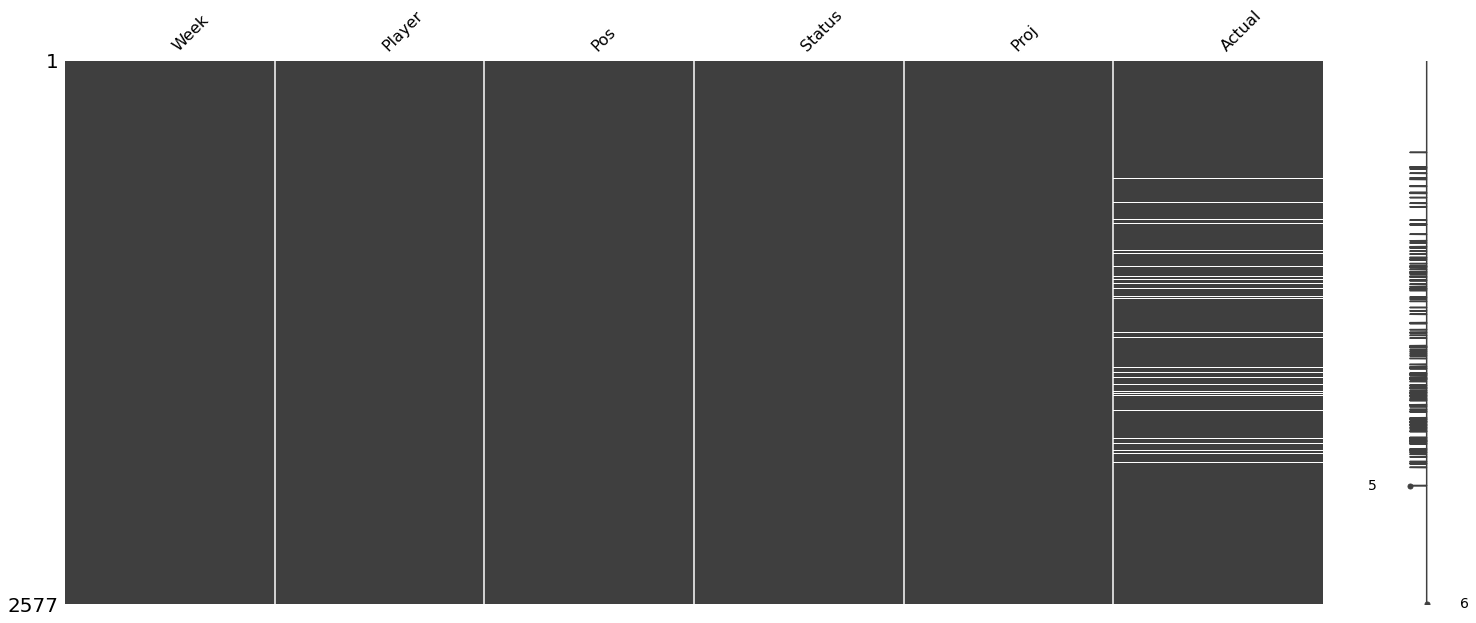

In [11]:
#check for Nan values using Missingno matrix 
msno.matrix(df)

In [12]:
#find Nan values
df[df['Actual'].isna()]

,Week,Player,Pos,Status,Proj,Actual
434,3,Antonio Brown,Bench,ACTIVE,0.0,NaN
503,4,Jamison Crowder,Bench,ACTIVE,0.0,NaN
505,4,Dante Pettis,Bench,ACTIVE,0.0,NaN
512,4,Robby Anderson,Bench,ACTIVE,0.0,NaN
533,4,Chris Herndon,Bench,QUESTIONABLE,0.0,NaN
...,...,...,...,...,...,...
1906,12,Dalvin Cook,Bench,ACTIVE,0.0,NaN
1910,12,Christian Kirk,Bench,ACTIVE,0.0,NaN
1926,12,LeSean McCoy,Bench,ACTIVE,0.0,NaN
1927,12,Austin Ekeler,Bench,ACTIVE,0.0,NaN


In [13]:
#replace Nan values with 0
df = df.fillna(0)

In [14]:
#confirm that there aren't any Nan values
df.isnull().values.any()

False

In [15]:
#renaming columns
df = df.rename(columns={'Status': 'injury_status','Player':'player_name'})

In [16]:
#validate that column name's been changed
list(df)

['Week', 'player_name', 'Pos', 'injury_status', 'Proj', 'Actual']

In [17]:
#replacing column values with integer values
df.injury_status.replace(['ACTIVE', 'QUESTIONABLE','OUT', 'SUSPENSION'], [0, 1,2,3], inplace=True)

In [18]:
#validate that string values have been replaced with integers
df.head(5)

,Week,player_name,Pos,injury_status,Proj,Actual
0,1,Saquon Barkley,RB,0,23.115309,17.90
1,1,Alvin Kamara,RB,0,21.168970,23.90
2,1,James White,Flex,0,13.946106,13.20
3,1,Tyler Boyd,WR,0,14.135564,14.30
4,1,Jared Goff,QB,0,17.244130,9.44


In [19]:
df.tail(5)

,Week,player_name,Pos,injury_status,Proj,Actual
2572,16,Austin Ekeler,Flex,0,16.054582,11.9
2573,16,Terry McLaurin,Bench,1,12.657177,15.6
2574,16,Jameis Winston,QB,1,19.503190,11.0
2575,16,David Montgomery,Bench,0,11.467978,6.9
2576,16,Randall Cobb,Bench,0,9.338627,12.3


In [20]:
#rename columns
df = df.rename(columns={'Week':'week_id','Pos':'position','Proj':'predicted','Actual':'actual'})

In [21]:
#check to see data type for week_id
df.dtypes

week_id            int64
player_name       object
position          object
injury_status      int64
predicted        float64
actual           float64
dtype: object

In [22]:
#convert week_id ints to strings 
df['week_id'] = df['week_id'].apply(str)

In [23]:
df.dtypes

week_id           object
player_name       object
position          object
injury_status      int64
predicted        float64
actual           float64
dtype: object

In [24]:
#reformat week_id values
df.week_id.replace (['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17'],['2019_01','2019_02','2019_03','2019_04','2019_05','2019_06','2019_07','2019_08','2019_09',
                       '2019_10','2019_11','2019_12','2019_13','2019_14','2019_15','2019_16','2019_17'],inplace=True)

In [25]:
#confirm week_id values have been changed
df.head()

,week_id,player_name,position,injury_status,predicted,actual
0,2019_01,Saquon Barkley,RB,0,23.115309,17.90
1,2019_01,Alvin Kamara,RB,0,21.168970,23.90
2,2019_01,James White,Flex,0,13.946106,13.20
3,2019_01,Tyler Boyd,WR,0,14.135564,14.30
4,2019_01,Jared Goff,QB,0,17.244130,9.44


In [26]:
#Add unique_id column with a placeholder value
df.insert(loc=1, column = 'unique_id',value = 'Player')
df.head()

,week_id,unique_id,player_name,position,injury_status,predicted,actual
0,2019_01,Player,Saquon Barkley,RB,0,23.115309,17.90
1,2019_01,Player,Alvin Kamara,RB,0,21.168970,23.90
2,2019_01,Player,James White,Flex,0,13.946106,13.20
3,2019_01,Player,Tyler Boyd,WR,0,14.135564,14.30
4,2019_01,Player,Jared Goff,QB,0,17.244130,9.44


In [27]:
df.tail()

,week_id,unique_id,player_name,position,injury_status,predicted,actual
2572,2019_16,Player,Austin Ekeler,Flex,0,16.054582,11.9
2573,2019_16,Player,Terry McLaurin,Bench,1,12.657177,15.6
2574,2019_16,Player,Jameis Winston,QB,1,19.503190,11.0
2575,2019_16,Player,David Montgomery,Bench,0,11.467978,6.9
2576,2019_16,Player,Randall Cobb,Bench,0,9.338627,12.3


In [28]:
#replace unique_id values with respective full name from 'Player' column and remove the space
df['unique_id'] = df.player_name.str.replace(' ', '')

In [29]:
df.head()

,week_id,unique_id,player_name,position,injury_status,predicted,actual
0,2019_01,SaquonBarkley,Saquon Barkley,RB,0,23.115309,17.90
1,2019_01,AlvinKamara,Alvin Kamara,RB,0,21.168970,23.90
2,2019_01,JamesWhite,James White,Flex,0,13.946106,13.20
3,2019_01,TylerBoyd,Tyler Boyd,WR,0,14.135564,14.30
4,2019_01,JaredGoff,Jared Goff,QB,0,17.244130,9.44


In [30]:
#make unique_id values all lowercase
df['unique_id'] = df['unique_id'].str.lower()

In [31]:
df.head()

,week_id,unique_id,player_name,position,injury_status,predicted,actual
0,2019_01,saquonbarkley,Saquon Barkley,RB,0,23.115309,17.90
1,2019_01,alvinkamara,Alvin Kamara,RB,0,21.168970,23.90
2,2019_01,jameswhite,James White,Flex,0,13.946106,13.20
3,2019_01,tylerboyd,Tyler Boyd,WR,0,14.135564,14.30
4,2019_01,jaredgoff,Jared Goff,QB,0,17.244130,9.44


In [32]:
#check values in 'position' column 
df.position.unique()

array(['RB', 'Flex', 'WR', 'QB', 'TE', 'Bench', 'IR'], dtype=object)

In [33]:
#make all positions lowercase
df['position'] = df['position'].str.lower()
df.head()

,week_id,unique_id,player_name,position,injury_status,predicted,actual
0,2019_01,saquonbarkley,Saquon Barkley,rb,0,23.115309,17.90
1,2019_01,alvinkamara,Alvin Kamara,rb,0,21.168970,23.90
2,2019_01,jameswhite,James White,flex,0,13.946106,13.20
3,2019_01,tylerboyd,Tyler Boyd,wr,0,14.135564,14.30
4,2019_01,jaredgoff,Jared Goff,qb,0,17.244130,9.44


In [34]:
#Add 'performance column'
df.insert(loc=7, column = 'performance',value = 1)
df.head()

,week_id,unique_id,player_name,position,injury_status,predicted,actual,performance
0,2019_01,saquonbarkley,Saquon Barkley,rb,0,23.115309,17.90,1
1,2019_01,alvinkamara,Alvin Kamara,rb,0,21.168970,23.90,1
2,2019_01,jameswhite,James White,flex,0,13.946106,13.20,1
3,2019_01,tylerboyd,Tyler Boyd,wr,0,14.135564,14.30,1
4,2019_01,jaredgoff,Jared Goff,qb,0,17.244130,9.44,1


In [35]:
#fill in performance values 
df.loc[df['predicted'] < df['actual'], 'performance'] = 0
df

,week_id,unique_id,player_name,position,injury_status,predicted,actual,performance
0,2019_01,saquonbarkley,Saquon Barkley,rb,0,23.115309,17.90,1
1,2019_01,alvinkamara,Alvin Kamara,rb,0,21.168970,23.90,0
2,2019_01,jameswhite,James White,flex,0,13.946106,13.20,1
3,2019_01,tylerboyd,Tyler Boyd,wr,0,14.135564,14.30,0
4,2019_01,jaredgoff,Jared Goff,qb,0,17.244130,9.44,1
...,...,...,...,...,...,...,...,...
2572,2019_16,austinekeler,Austin Ekeler,flex,0,16.054582,11.90,1
2573,2019_16,terrymclaurin,Terry McLaurin,bench,1,12.657177,15.60,0
2574,2019_16,jameiswinston,Jameis Winston,qb,1,19.503190,11.00,1
2575,2019_16,davidmontgomery,David Montgomery,bench,0,11.467978,6.90,1


In [36]:
#how many instances people over/under performed? 0 = overperformed, 1 = underperformed
df.performance.value_counts()

1    1631
0     946
Name: performance, dtype: int64

In [37]:
#Add 'performance difference' column
df.insert(loc=8, column = 'performance_difference',value = df['actual']-df['predicted'])
df.head()

,week_id,unique_id,player_name,position,injury_status,predicted,actual,performance,performance_difference
0,2019_01,saquonbarkley,Saquon Barkley,rb,0,23.115309,17.90,1,-5.215309
1,2019_01,alvinkamara,Alvin Kamara,rb,0,21.168970,23.90,0,2.731030
2,2019_01,jameswhite,James White,flex,0,13.946106,13.20,1,-0.746106
3,2019_01,tylerboyd,Tyler Boyd,wr,0,14.135564,14.30,0,0.164436
4,2019_01,jaredgoff,Jared Goff,qb,0,17.244130,9.44,1,-7.804130


In [38]:
#find the mean of how much a player over/under performed
df['performance_difference'].mean()

-0.08198883610223524

In [39]:
#find the number of instances each position under-performed and over-performed
df.groupby(['position','performance']).size()

position  performance
bench     0              285
          1              670
flex      0              146
          1              238
ir        0                1
          1               86
qb        0              100
          1               92
rb        0              156
          1              228
te        0               80
          1              111
wr        0              178
          1              206
dtype: int64

In [40]:
#which position garnered the most actual fantasy points?
df.groupby('position', as_index=False).agg({"actual": "sum"}).sort_values(by=['actual'],ascending=False)

,position,actual
0,bench,6517.68
4,rb,5709.02
6,wr,5517.68
1,flex,4544.48
3,qb,3647.24
5,te,2068.40
2,ir,65.58


In [41]:
#which positions had the highest total predictions?
df.groupby('position', as_index=False).agg({"predicted": "sum"}).sort_values(by=['predicted'],ascending=False)

,position,predicted
0,bench,6553.307530
4,rb,5902.314912
6,wr,5348.387167
1,flex,4754.535085
3,qb,3579.916026
5,te,2056.437572
2,ir,86.466939


In [42]:
# use pivot table to find how positions performed over the course of the season.
pd.set_option("display.max_rows", None, "display.max_columns", None)
points_by_week = pd.pivot_table(df, index = ["week_id","position"], values = "actual", aggfunc = "sum")
print(points_by_week)

                  actual
week_id position        
2019_01 bench     603.30
        flex      338.38
        ir          0.00
        qb        192.82
        rb        380.10
        te        143.30
        wr        377.60
2019_02 bench     460.38
        flex      271.20
        ir          0.00
        qb        241.02
        rb        319.80
        te        113.50
        wr        377.80
2019_03 bench     476.76
        flex      300.10
        ir          0.00
        qb        264.22
        rb        379.00
        te        169.90
        wr        369.70
2019_04 bench     392.60
        flex      282.00
        ir          0.00
        qb        196.28
        rb        407.00
        te        126.50
        wr        246.30
2019_05 bench     361.38
        flex      333.10
        ir          0.00
        qb        262.44
        rb        447.02
        te         99.60
        wr        361.50
2019_06 bench     313.20
        flex      315.40
        ir          0.00


In [43]:
#find the top performing players based on total actual ff points.
df.groupby(['player_name', 'position']).agg({"actual": "sum"}).sort_values(by=['actual'],ascending=False)

,,actual
player_name,position,
Christian McCaffrey,rb,448.40
Michael Thomas,wr,366.90
Deshaun Watson,qb,309.38
Russell Wilson,qb,308.38
Ezekiel Elliott,rb,284.30
Aaron Jones,rb,279.60
Dak Prescott,qb,274.76
DeAndre Hopkins,wr,268.54
Lamar Jackson,qb,265.42


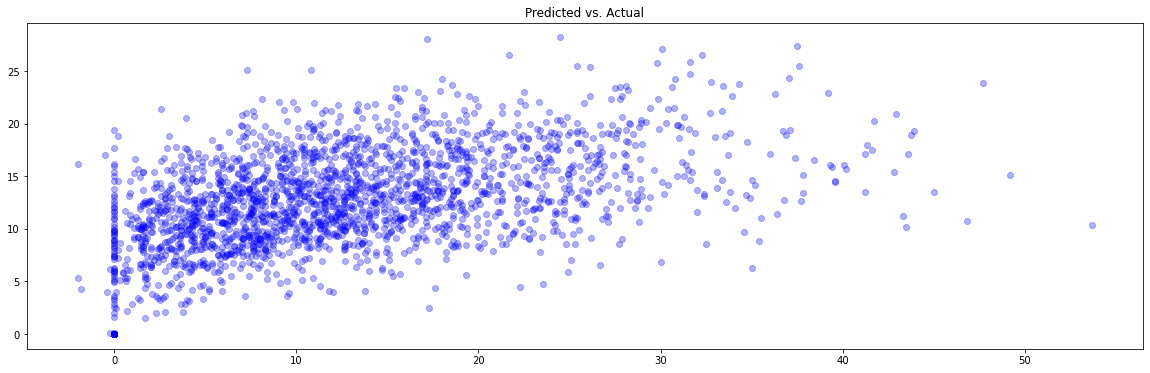

In [44]:
#around what range do players actually perform vs. predicted to perform?
plt.figure(figsize=(20,6))
plt.scatter(df['actual'], df['predicted'], alpha = 0.3, color="blue")
plt.title('Predicted vs. Actual')
plt.show()

<AxesSubplot:xlabel='week_id', ylabel='actual'>

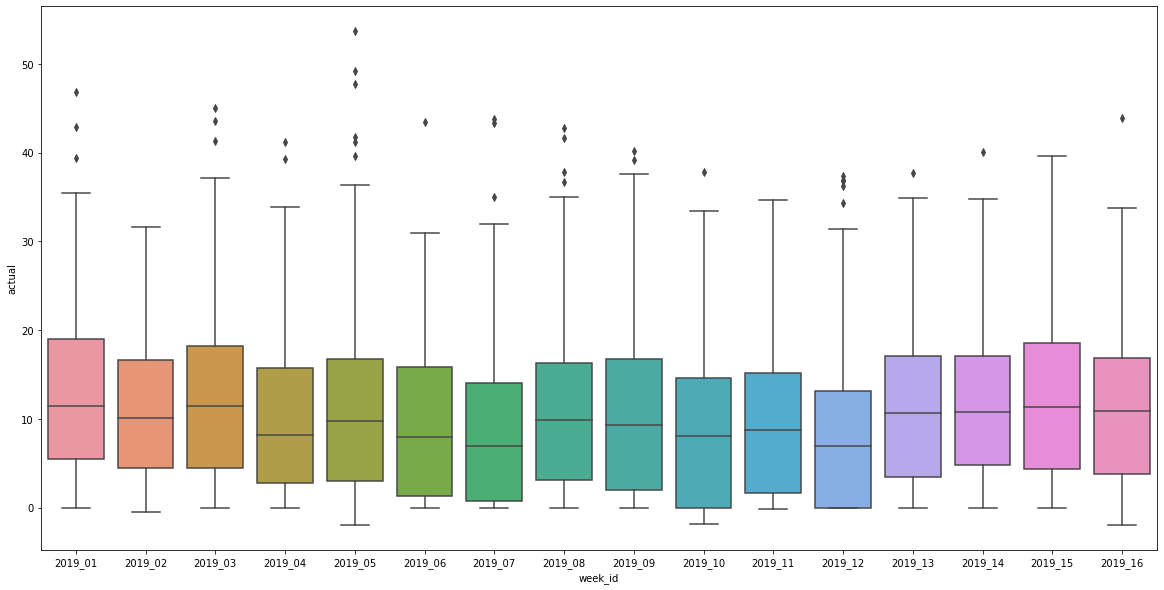

In [45]:
#visualize the week-to-week performance dispersion

fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(x="week_id", y="actual",data=df)

In [47]:
df.to_csv('C:/Users/Yaphet Tewahade/Cloudy-with-a-Chance-of-Football/fixtures/cleaned_data/datapros_cleaner.csv')